In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [ ]:
data_dir = '/content/gdrive/MyDrive/CMPE255/Final_Project/Train/'

In [ ]:
img_height, img_width = 224, 224

In [ ]:
batch_size = 32

In [ ]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  "/content/gdrive/MyDrive/CMPE255/Final_Project/Train/",
  image_size = (img_height, img_width),
  batch_size = batch_size
)
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
  "/content/gdrive/MyDrive/CMPE255/Final_Project/Test/",
  image_size = (img_height, img_width),
  batch_size = batch_size
)
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  "/content/gdrive/MyDrive/CMPE255/Final_Project/Val/",
  image_size = (img_height, img_width),
  batch_size = batch_size
)

Found 224 files belonging to 2 classes.
Found 40 files belonging to 2 classes.
Found 60 files belonging to 2 classes.


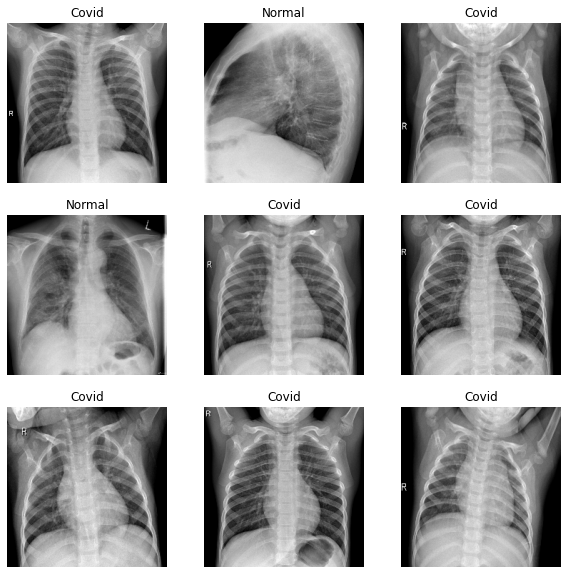

In [ ]:
class_name = ["Normal", "Covid"]
plt.figure(figsize = (10, 10))
for image, label in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(image[i].numpy().astype("uint8"))
    plt.title(class_name[label[i]])
    plt.axis("off")

In [ ]:
model = tf.keras.Sequential(
    [
     #color from 1-255
     tf.keras.layers.Rescaling(1./255),
     tf.keras.layers.Conv2D(32, 3, activation = "relu"),
     tf.keras.layers.MaxPooling2D(),
     tf.keras.layers.Conv2D(32, 3, activation = "relu"),
     tf.keras.layers.MaxPooling2D(),
     tf.keras.layers.Conv2D(32, 3, activation = "relu"),
     tf.keras.layers.MaxPooling2D(),
     tf.keras.layers.Flatten(),
     tf.keras.layers.Dense(128, activation = "relu"),
     #class number
     tf.keras.layers.Dense(2)
    ]    
)

In [ ]:
model.compile(
    optimizer = "adam",
    loss = tf.losses.SparseCategoricalCrossentropy(from_logits = True),
    metrics = ['accuracy']
)

In [ ]:
history = model.fit(
    train_ds,
    validation_data = val_ds,
    epochs = 10
)

Epoch 1/10
7/7 [==============================] - 3s 350ms/step - loss: 1.0507 - accuracy: 0.5446 - val_loss: 0.5940 - val_accuracy: 0.7000
Epoch 2/10
7/7 [==============================] - 3s 322ms/step - loss: 0.4856 - accuracy: 0.8661 - val_loss: 0.3072 - val_accuracy: 0.9500
Epoch 3/10
7/7 [==============================] - 3s 325ms/step - loss: 0.1940 - accuracy: 0.9732 - val_loss: 0.1090 - val_accuracy: 0.9667
Epoch 4/10
7/7 [==============================] - 3s 326ms/step - loss: 0.0438 - accuracy: 0.9911 - val_loss: 0.2267 - val_accuracy: 0.9667
Epoch 5/10
7/7 [==============================] - 3s 324ms/step - loss: 0.0297 - accuracy: 0.9866 - val_loss: 0.0774 - val_accuracy: 0.9667
Epoch 6/10
7/7 [==============================] - 3s 326ms/step - loss: 0.0079 - accuracy: 1.0000 - val_loss: 0.1314 - val_accuracy: 0.9667
Epoch 7/10
7/7 [==============================] - 3s 323ms/step - loss: 0.0040 - accuracy: 1.0000 - val_loss: 0.1761 - val_accuracy: 0.9667
Epoch 8/10
7/7 [====

In [ ]:
model.evaluate(test_ds)

2/2 [==============================] - 0s 23ms/step - loss: 0.0595 - accuracy: 0.9750


[0.05950333923101425, 0.9750000238418579]

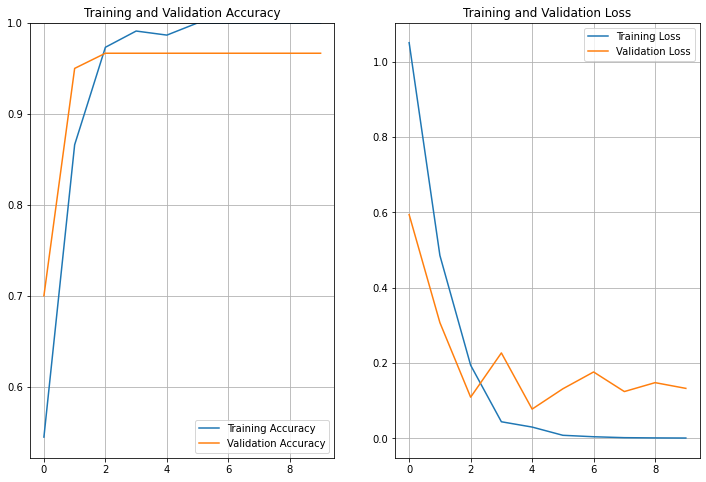

In [ ]:
def plot_history(history, metric, val_metric):
  acc = history.history[metric]
  val_acc = history.history[val_metric]

  loss=history.history['loss']
  val_loss=history.history['val_loss']

  epochs_range = range(len(acc))

  fig=plt.figure(figsize=(12, 8))
  plt.subplot(1, 2, 1)
  plt.plot(epochs_range, acc, label='Training Accuracy')
  plt.plot(epochs_range, val_acc, label='Validation Accuracy')
  plt.legend(loc='lower right')
  plt.ylim([min(plt.ylim()),1])
  plt.grid(True)
  plt.title('Training and Validation Accuracy')

  plt.subplot(1, 2, 2)
  plt.plot(epochs_range, loss, label='Training Loss')
  plt.plot(epochs_range, val_loss, label='Validation Loss')
  plt.legend(loc='upper right')
  plt.grid(True)
  plt.title('Training and Validation Loss')
  plt.show()
  fig.savefig('traininghistory.pdf')

plot_history(history, 'accuracy', 'val_accuracy')

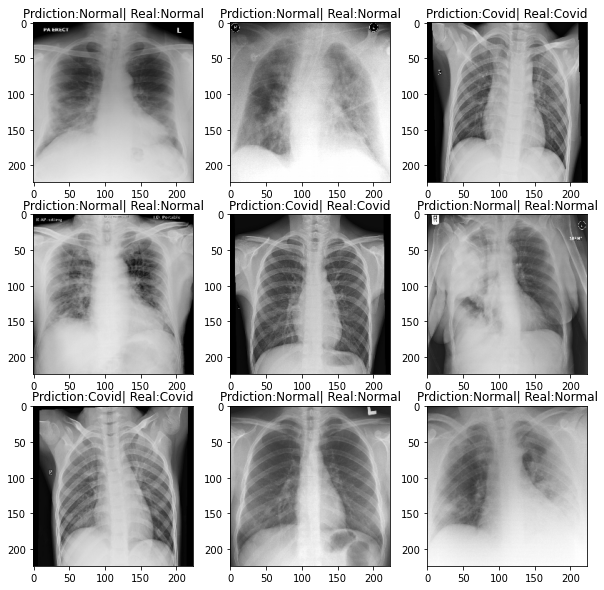

In [ ]:
import numpy as np

plt.figure(figsize = (10, 10))
for image, label in test_ds.take(1):
  classification = model(image)

  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(image[i].numpy().astype("uint8"))
    index = np.argmax(classification[i])
    plt.title("Prdiction:" + class_name[index] + "| Real:" + class_name[label[i]])

In [ ]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

with open("model.tflite", 'wb') as f:
  f.write(tflite_model)

INFO:tensorflow:Assets written to: /tmp/tmp3ok6grzw/assets
